In [23]:
#!pip install yfinance
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import seaborn as sns
import yfinance as yf

In [17]:
manu = yf.download('MANU', start="2020-01-01", end="2020-12-31",parse_dates=['date']) 
# Return the last rows of `data`
#data.----()
# Return the first rows of `data`
manu.head()
# Describe `data`
manu.describe()

def get(tickers, startdate, enddate):
    def data(ticker):
        return (yf.download(ticker, start=startdate, end=enddate))
    datas = map (data, tickers)
    return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

#tickers = ['MANU']
#manu = get(tickers, datetime.datetime(2020, 1, 1), datetime.datetime(2020, 12, 31))
manu.head()
manu.tail()
#manu.describe()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-23,16.260000,16.730000,16.260000,16.600000,16.403685,62600
2020-12-24,16.600000,16.709999,16.510000,16.629999,16.433327,27600
2020-12-28,16.660000,17.000000,16.580000,16.850000,16.650728,99300
2020-12-29,16.950001,16.990000,16.299999,16.360001,16.166523,89200
2020-12-30,16.459999,16.600000,16.309999,16.420000,16.225813,114100


In [18]:
monthly_manu = manu.resample('M').mean()
print(monthly_manu)

quart_manu = manu.resample('Q').mean()
#print(quart_manu)

                 Open       High        Low      Close  Adj Close  \
Date                                                                
2020-01-31  19.788095  19.922857  19.587619  19.737143  19.290025   
2020-02-29  18.969474  19.195263  18.737895  18.943158  18.514027   
2020-03-31  15.244091  15.680000  14.742727  15.173636  14.829898   
2020-04-30  15.474286  15.837143  15.142857  15.440000  15.114831   
2020-05-31  16.170500  16.547000  15.873000  16.184000  15.903755   
2020-06-30  16.428182  16.656364  16.114091  16.371818  16.088321   
2020-07-31  15.263636  15.380909  14.971364  15.131364  14.869347   
2020-08-31  15.047143  15.238571  14.906667  15.082857  14.821680   
2020-09-30  15.690000  15.807143  15.417619  15.538572  15.269503   
2020-10-31  14.123182  14.304546  13.887273  14.082727  13.838869   
2020-11-30  15.049500  15.317000  14.832500  15.086000  14.833355   
2020-12-31  16.350000  16.519048  16.141429  16.369524  16.175933   

                   Volume  
Date 

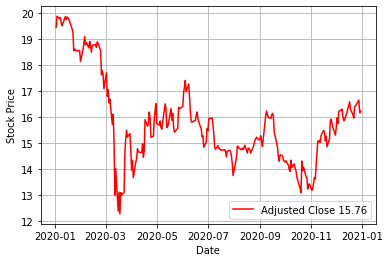

In [19]:
# Plot the closing prices for `aapl`
AdjClose=manu['Adj Close']
AdjCloseMean=round(AdjClose.mean(),2)
plt.plot(manu['Adj Close'],'r',label='Adjusted Close '+str(AdjCloseMean))
# Show the plot
plt.legend(loc=4)
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.grid()
plt.show()

<AxesSubplot:title={'center':'Daily Percent Change'}, ylabel='Instances'>

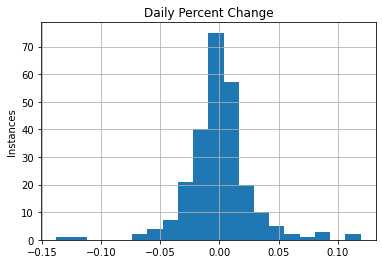

In [20]:
daily_close=manu['Close']
daily_pct_change = daily_close.pct_change()
plt.title("Daily Percent Change")
plt.ylabel("Instances")
daily_pct_change.hist(bins=20)

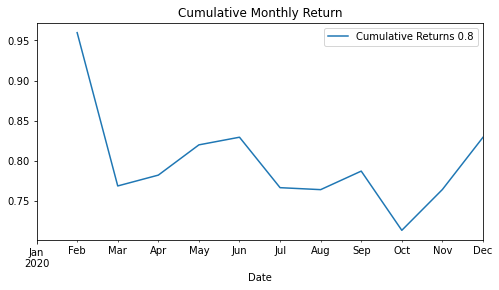

In [21]:
monthly_close=monthly_manu['Close']
monthly_pct_change = monthly_close.pct_change()

cum_monthly_return = (1 + monthly_pct_change).cumprod()
cum_monthlyavg=round(cum_monthly_return.mean(),2)
cum_monthly_return.plot(figsize=(8,4),label='Cumulative Returns '+str(cum_monthlyavg))
plt.title('Cumulative Monthly Return')
leg=plt.legend()
plt.show()

In [24]:
def get(tickers, startdate, enddate):
  def data(ticker):
    return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
  datas = map (data, tickers)
  return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

tickers = ['MANU', 'MSFT', 'IBM', 'GOOG']
all_data = get(tickers, datetime.datetime(2020, 1, 1), datetime.datetime(2020, 12, 31))

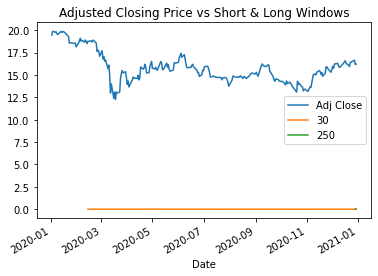

In [25]:
adj_close=manu['Adj Close']
adj_close_px=adj_close.pct_change()

manu['30'] = adj_close_px.rolling(window=30).mean()

# Long moving window rolling mean
manu['250'] = adj_close_px.rolling(window=250).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
manu[['Adj Close', '30', '250']].plot()
plt.title('Adjusted Closing Price vs Short & Long Windows')
# Show plot
plt.show()

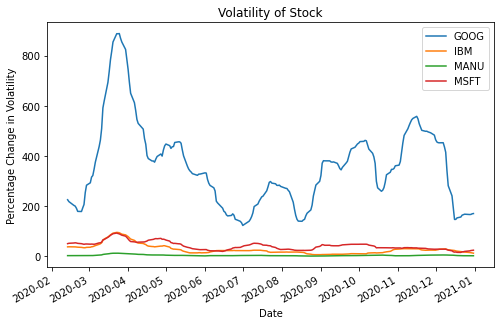

In [27]:
min_periods = 30
daily_close_px = all_data[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')
# Calculate the volatility
vol = daily_close_px.rolling(min_periods).std() * np.sqrt(min_periods) 

# Plot the volatility
vol.plot(figsize=(8, 5),label='Volatility')

# Show the plot
leg=plt.legend()
plt.title('Volatility of Stock')
plt.ylabel("Percentage Change in Volatility")
plt.show()


In [29]:
# Initialize the short and long windows
short_window = 30
long_window = 90

# Initialize the `signals` DataFrame with the `signal` column
signals = pd.DataFrame(index=manu.index)  #make an empty signals DataFrame, but do make sure to copy the index of your aapl data
signals['signal'] = 0.0  #Create a column in your empty signals DataFrame that is named signal 
#and initialize it by setting the value for all rows in this column to 0.0

# Create short simple moving average over the short window
signals['short_mavg'] = manu['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

#1 as the minimum number of observations in the window that are required to have a value, and False, 
#so that the labels are not set at the center of the window.
 #Next, don’t forget to also chain the mean() function so that you calculate the rolling mean.


# Create long simple moving average over the long window
signals['long_mavg'] = manu['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

# Create signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:], 1.0, 0.0)   

# Generate trading orders
#you take the difference of the signals in order to generate actual trading orders.
signals['positions'] = signals['signal'].diff()

# Print `signals`
print(signals)

            signal  short_mavg  long_mavg  positions
Date                                                
2020-01-02     0.0   19.920000  19.920000        NaN
2020-01-03     0.0   20.135000  20.135000        0.0
2020-01-06     0.0   20.173333  20.173333        0.0
2020-01-07     0.0   20.205000  20.205000        0.0
2020-01-08     0.0   20.182000  20.182000        0.0
...            ...         ...        ...        ...
2020-12-23     1.0   16.008333  15.192778        0.0
2020-12-24     1.0   16.050333  15.210111        0.0
2020-12-28     1.0   16.102333  15.230111        0.0
2020-12-29     1.0   16.128667  15.245222        0.0
2020-12-30     1.0   16.150667  15.262445        0.0

[252 rows x 4 columns]


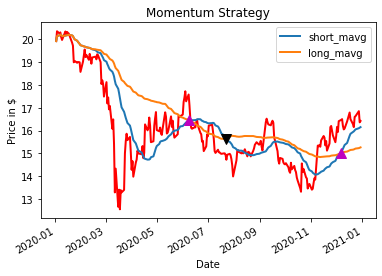

In [30]:
# Initialize the plot figure
fig = plt.figure()

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
manu['Close'].plot(ax=ax1, color='r', lw=2.)

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='m')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k')
         
# Show the plot
plt.title('Momentum Strategy')
plt.show()

In [41]:
# Set the initial capital
initial_capital= float(100000.0)

# Create a DataFrame `positions`
positions = pd.DataFrame(index=signals.index).fillna(0.0)  
# Once again, you copy the index from another DataFrame; 
#In this case, this is the signals DataFrame because you want to consider the time frame for which you have generated the signals.

# Buy a 100 shares
positions['MANU'] = 100*signals['signal']   
  
# Initialize the portfolio with value owned 
#A new DataFrame portfolio is created to store the market value of an open position  
portfolio = positions.multiply(manu['Adj Close'], axis=0)

# Store the differences in positions (or number of stock)
pos_diff = positions.diff()

# Add `holdings` to portfolio
#you create a new column to the portfolio DataFrame with name holdings,
# which stores the value of the positions or shares you have bought, multiplied by the ‘Adj Close’ price.
portfolio['holdings'] = (positions.multiply(manu['Adj Close'], axis=0)).sum(axis=1)

# Add `cash` to portfolio which is the capital that you still have left to spend
portfolio['cash'] = initial_capital - (pos_diff.multiply(manu['Adj Close'], axis=0)).sum(axis=1).cumsum()   

# Add `total` to portfolio which contains the sum of your cash and the holdings that you own
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add `returns` to portfolio in which you’ll store the returns
portfolio['returns'] = portfolio['total'].pct_change()

portfolio.tail()

,MANU,holdings,cash,total,returns
Date,,,,,
2020-12-23,1640.368462,1640.368462,98160.218143,99800.586605,0.000446
2020-12-24,1643.332672,1643.332672,98160.218143,99803.550816,0.000030
2020-12-28,1665.072823,1665.072823,98160.218143,99825.290966,0.000218
2020-12-29,1616.652298,1616.652298,98160.218143,99776.870441,-0.000485
2020-12-30,1622.581291,1622.581291,98160.218143,99782.799435,0.000059


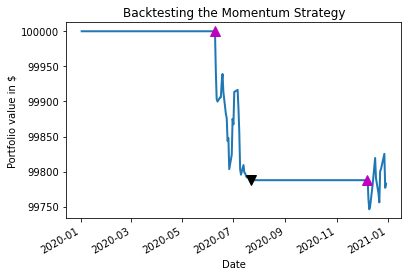

In [43]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
portfolio['total'].plot(ax=ax1, lw=2.)

# Plot the "buy" trades against the equity curve
ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='m')

# Plot the "sell" trades against the equity curve
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k')
#leg=plt.legend()
# Show the plot
plt.title("Backtesting the Momentum Strategy")
plt.show()

In [33]:
# Isolate the returns of your strategy
returns = portfolio['returns']

# annualized Sharpe ratio
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())

# Print the Sharpe ratio
print("The sharpe ratio for the strategy is",sharpe_ratio)

The sharpe ratio for the strategy is -1.2723817133574518


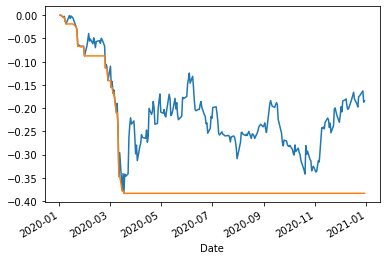

The maximum daily drawdown for Manchester United so far is -0.32560152612717946


In [34]:
# Define a trailing 252 trading day window
window = 252

# Calculate the max drawdown in the past window days for each day
rolling_max = manu['Adj Close'].rolling(window, min_periods=1).max()
daily_drawdown = manu['Adj Close']/rolling_max - 1.0

# Calculate the minimum (negative) daily drawdown
max_daily_drawdown = daily_drawdown.rolling(window, min_periods=1).min()

# Plot the results
daily_drawdown.plot()
max_daily_drawdown.plot()

# Show the plot
plt.show()
print("The maximum daily drawdown for Manchester United so far is",max_daily_drawdown.mean())